In [1]:
from montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario 1: A 2-headed coin


Create 2 coin objects.

In [2]:
coin_faces = np.array(['H','T'])
coin1 = Die(coin_faces)
coin2 = Die(coin_faces)
coin2.change_weight('H', 5)

Create a coin game with 3 fair coins.

In [4]:
coin_list = [coin1, coin1, coin1]
coin_game = Game(coin_list)
coin_game.play(1000)

Create analyzer object to determine the frequency of jackpots.

In [5]:
coin_analyzer = Analyzer(coin_game)
jackpot1 = coin_analyzer.jackpot()
print(f"Number of jackpots: {jackpot1}")

Number of jackpots: 278


In [6]:
print(f"Percentage of rolls that are jackpots: {coin_analyzer.jackpot()/len(coin_analyzer.jackpot_df)}")

Percentage of rolls that are jackpots: 0.278


Create a coin game with 2 unfair coins and 1 fair.

In [7]:
coin_list1 = [coin1, coin2, coin2]
coin_game1 = Game(coin_list1)
coin_game1.play(1000)

Create analyzer object to determine the frequency of jackpots.

In [8]:
coin_analyzer1 = Analyzer(coin_game1)
jackpot2 = coin_analyzer1.jackpot()
print(f"Number of jackpots: {jackpot2}")

Number of jackpots: 353


In [9]:
print(f"Percentage of rolls that are jackpots: {coin_analyzer1.jackpot()/len(coin_analyzer1.jackpot_df)}")

Percentage of rolls that are jackpots: 0.353


Two frequencies compares in a simple bar chart.

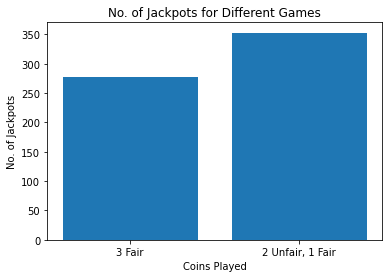

In [10]:
data = {'3 Fair':jackpot1, '2 Unfair, 1 Fair':jackpot2}
coins = list(data.keys())
jackpots = list(data.values())
plt.bar(coins, jackpots)
plt.title("No. of Jackpots for Different Games")
plt.ylabel("No. of Jackpots")
plt.xlabel("Coins Played")
plt.show()

## Scenario 2: A 6-sided die

Create 3 different Die objects. One fair and two unfair.

In [11]:
die_faces = np.array([1,2,3,4,5,6])
die1 = Die(die_faces)
die2 = Die(die_faces)
die2.change_weight(6, 5)
die3 = Die(die_faces)
die3.change_weight(1, 5)

Create a die game with 5 fair dice.

In [23]:
die_list1 = [die1, die1, die1, die1, die1]
die_game1 = Game(die_list1)
die_game1.play(1000)

Create analyzer object to determine frequency of jackpots.

In [24]:
die_analyzer1 = Analyzer(die_game1)
die_jackpot1 = die_analyzer1.jackpot()
print(f"Number of jackpots: {die_jackpot1}")

Number of jackpots: 0


Create a die game with 2 unfair dice of type 1, 1 unfair die of type 2, and 2 fair dice.

In [16]:
die_list2 = [die1, die1, die2, die2, die3]
die_game2 = Game(die_list2)
die_game2.play(1000)

Create analyzer object to determine frequency of jackpots.

In [68]:
die_analyzer2 = Analyzer(die_game2)
die_jackpot2 = die_analyzer2.jackpot()
print(f"Number of jackpots: {die_jackpot2}")

Number of jackpots: 1


Compare jackpot results in a bar chart.

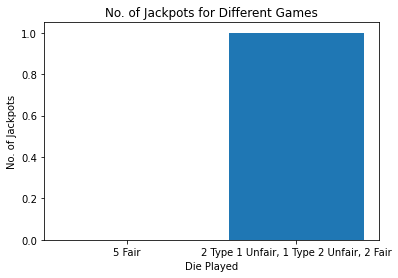

In [18]:
data = {'5 Fair':die_jackpot1, '2 Type 1 Unfair, 1 Type 2 Unfair, 2 Fair':die_jackpot2}
die = list(data.keys())
jackpots = list(data.values())
plt.bar(die, jackpots)
plt.title("No. of Jackpots for Different Games")
plt.ylabel("No. of Jackpots")
plt.xlabel("Die Played")
plt.show()

Plot 10 most frequent combinations of faces for the fair game.

In [70]:
die_analyzer1.combo()
data = die_analyzer1.combo_df.sort_values(by=['Counts'], ascending=False).head(10)
counts1 = list(data['Counts'])
index1 = [str(data.index[i]) for i in range(10)]

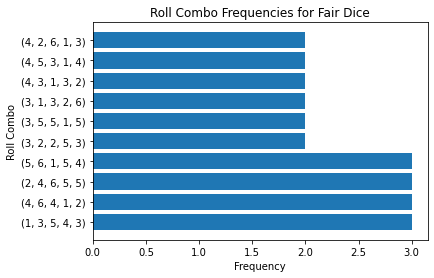

In [73]:
plt.barh(index1, counts1)
plt.xlabel("Frequency")
plt.ylabel("Roll Combo")
plt.title("Roll Combo Frequencies for Fair Dice")
plt.show()

In [71]:
die_analyzer2.combo()
data = die_analyzer2.combo_df.sort_values(by=['Counts'], ascending=False).head(10)
counts2 = list(data['Counts'])
index2 = [str(data.index[i]) for i in range(10)]

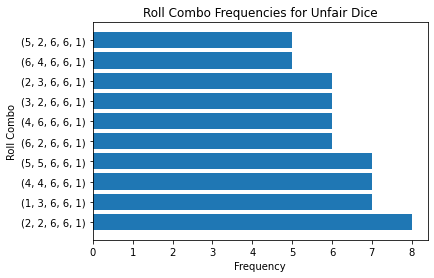

In [74]:
plt.barh(index2, counts2)
plt.xlabel("Frequency")
plt.ylabel("Roll Combo")
plt.title("Roll Combo Frequencies for Unfair Dice")
plt.show()

## Scenario 3: Letters of the Roman Alphabet

Create a Die object with letters as faces.

In [76]:
alphabet = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
letters = Die(alphabet)
letters_freq = pd.read_csv("letter-freqs.csv")

In [78]:
for i in range(len(alphabet)):
    letters.change_weight(str(alphabet[i]), float(letters_freq.frequency[i]))

Play a game with 5 dice and 1000 rolls.

In [79]:
letters_list = [letters, letters, letters, letters, letters]
letters_game = Game(letters_list)
letters_game.play(1000)

Count how many of the combinations make actual English words.

In [81]:
pd.set_option('display.max_rows', 1000)
#letters_game.show_play()

Approximately 14 of the 1000 combinations made up an English-sounding word.

On average, it appears that somewhere between 12 to 20 of the 1000 combinations make up an English-sounding word.